In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df_sales = pd.read_csv('./Train.csv')

In [14]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


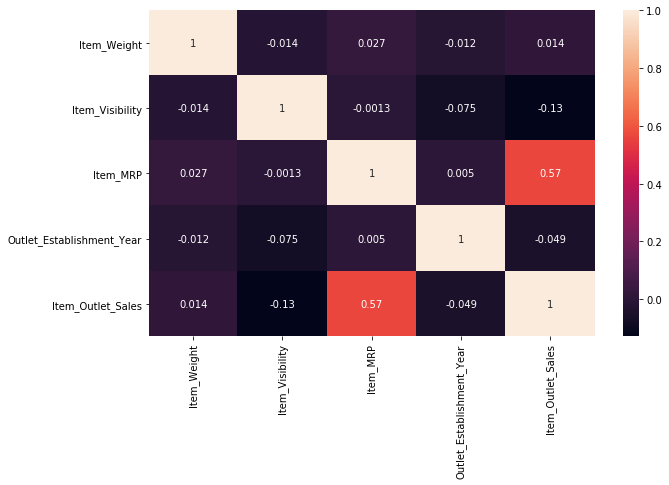

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df_sales.corr(),annot=True)

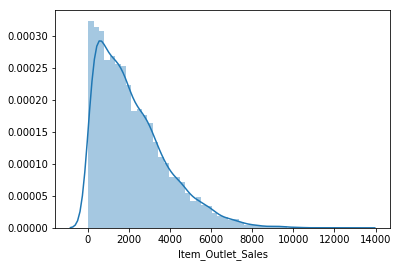

In [6]:
sns.distplot(df_sales['Item_Outlet_Sales'])

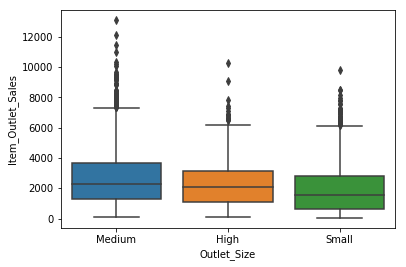

In [8]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data= df_sales)

In [9]:
ndf_sale=df_sales[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales',]]


C:\Users\Shivam\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Shivam\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


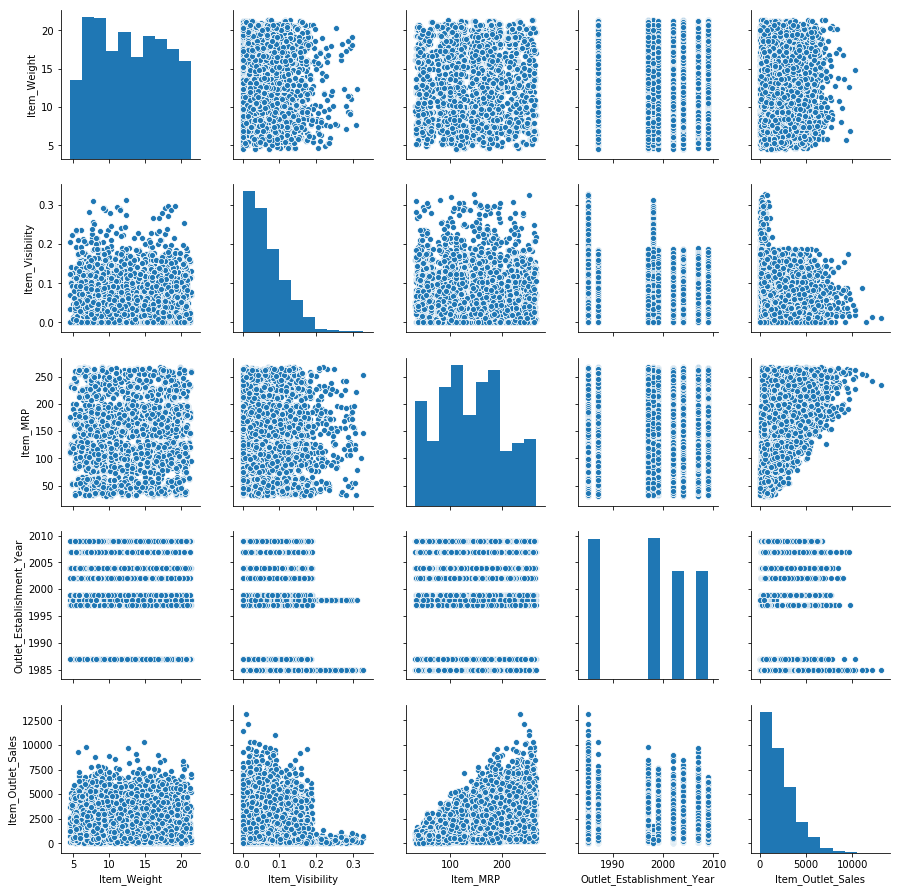

In [10]:
sns.pairplot(ndf_sale)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001188E232320>,
      dtype=object)

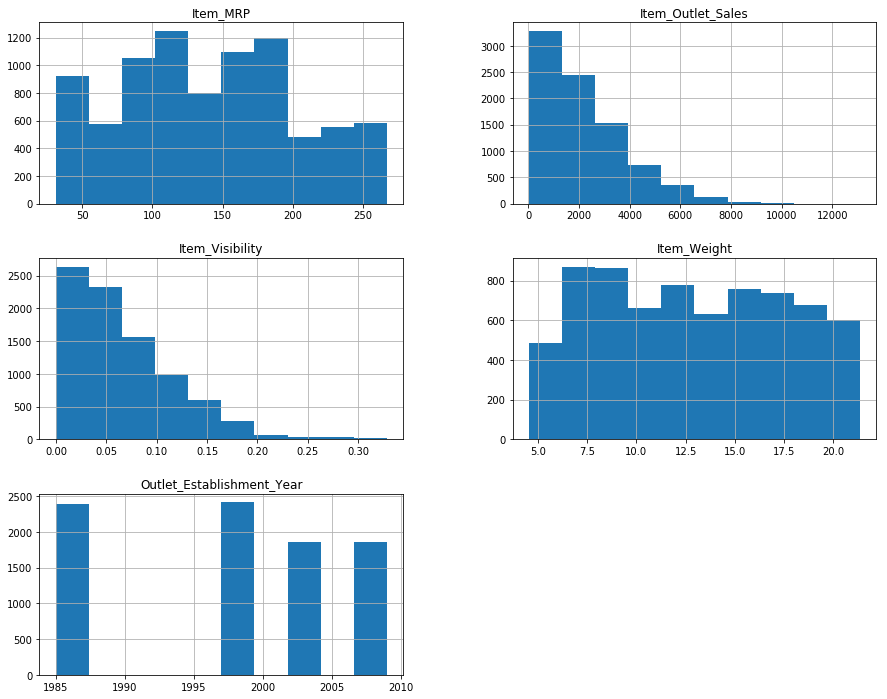

In [11]:
df_sales.hist(figsize=(15,12))

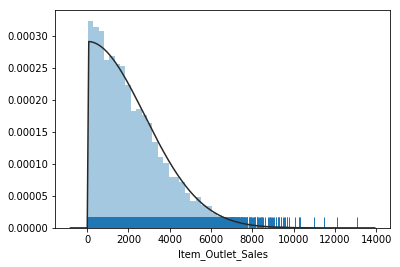

In [13]:
from scipy.stats import skewnorm

sns.distplot(df_sales['Item_Outlet_Sales'],kde=False, rug=True, fit=skewnorm)#bins=[0, 1000, 2500, 4500, 6500, 8500, 10500, 12000]); #or bins=10

In [15]:
df_sales.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


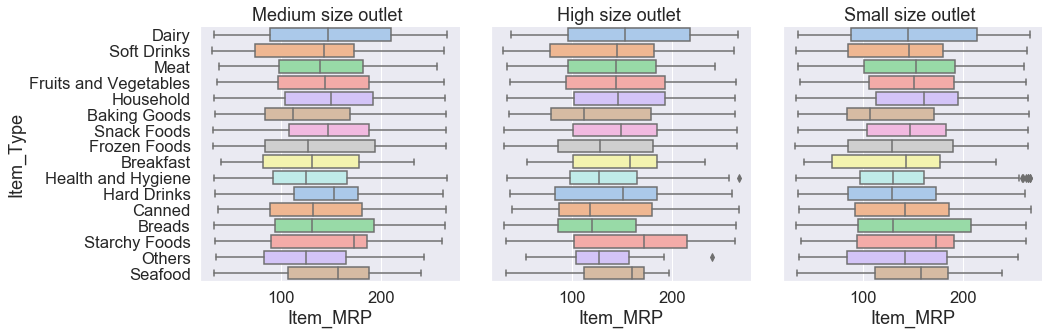

In [9]:
sns.set(style='darkgrid',font_scale=1.5)
g = sns.catplot(x="Item_MRP",y='Item_Type',col='Outlet_Size',data=df_sales,palette='pastel', kind="box")

g.set_titles(col_template="{col_name} size outlet ")

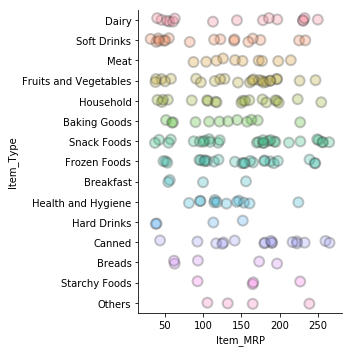

In [17]:
sns.catplot(x="Item_MRP",y='Item_Type',data=df_sales.head(200), kind="strip",alpha=0.3,s=10,linewidth=2)

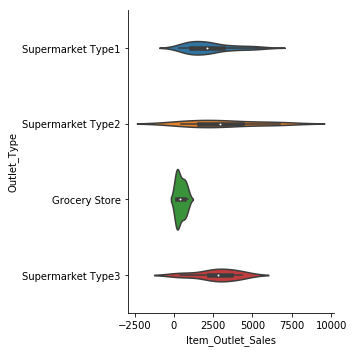

In [3]:
sns.catplot(x="Item_Outlet_Sales",y='Outlet_Type',data=df_sales.head(100), kind="violin")

## Swarmplot

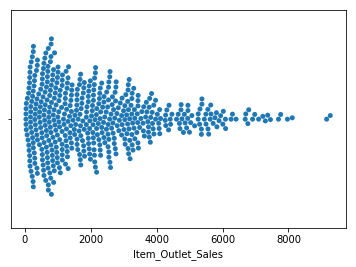

In [4]:
sns.swarmplot(df_sales.head(500).Item_Outlet_Sales)

## RegPlot

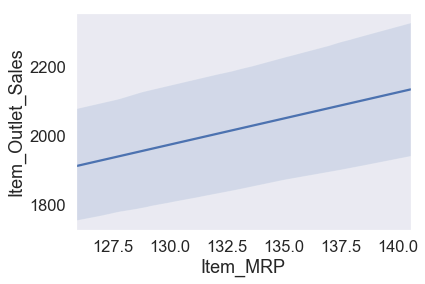

In [23]:
data=df_sales.sample(n=200,random_state=44)
sns.set_style('dark')
sns.regplot(data.Item_MRP,data.Item_Outlet_Sales,scatter=False)

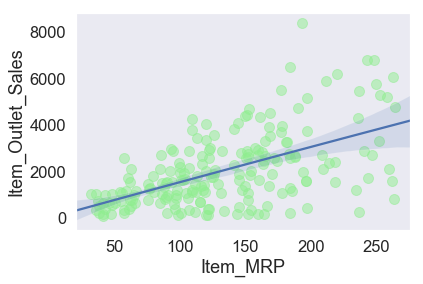

In [29]:
#Polynomial
sns.set_style('dark')
sns.regplot(data.Item_MRP,data.Item_Outlet_Sales,order=2,scatter_kws={'s':100,'alpha':0.5,'color':'lightgreen'})
#Robust, logistic (in case on of the variable is binary).

## Relplot

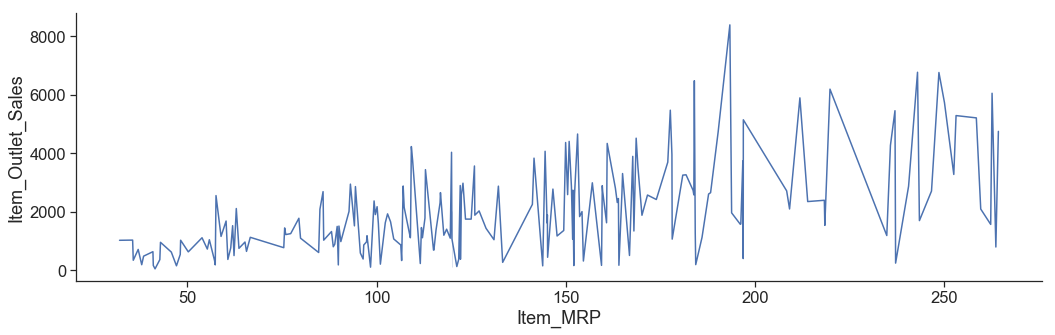

In [50]:
palette = sns.color_palette("rocket_r")
sns.set_style("ticks")
sns.relplot(
    data=data,
    x="Item_MRP", y="Item_Outlet_Sales",palette=palette,kind="line",aspect=3
)

## Jointgrid

C:\Users\Shivam\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'fill', 'thresh'
  s)


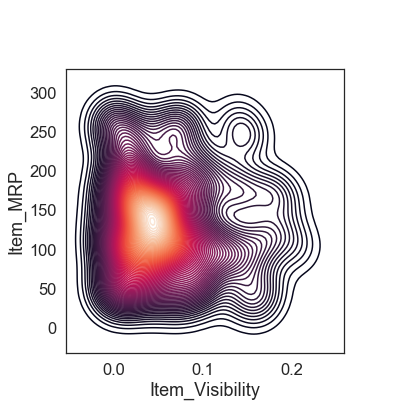

In [52]:
sns.set_style("white")


g = sns.JointGrid(data=data, x="Item_Visibility", y="Item_MRP", space=0)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=100, cmap="rocket")

## Displot


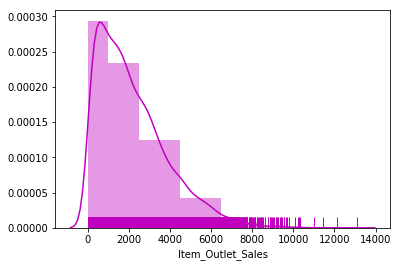

In [5]:

sns.distplot(df_sales['Item_Outlet_Sales'],kde=True, rug=True, bins=[0, 1000, 2500, 4500, 6500, 8500, 10500, 12000], color='m') 

## Boxplot 1

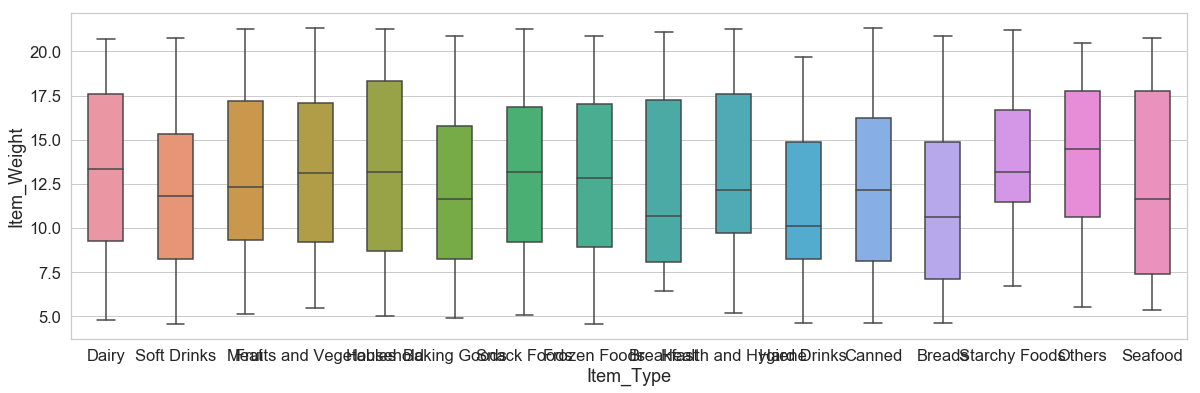

In [10]:
plt.figure(figsize=(20,6))
sns.set_style("whitegrid")
sns.boxplot(x='Item_Type',y='Item_Weight', data=df_sales, width=0.5)

## Boxplot 2

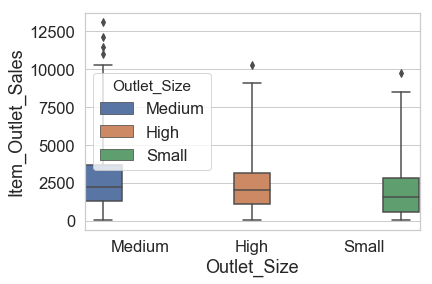

In [15]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales', data= df_sales, width=1, whis=3, hue='Outlet_Size');

## Violinplot

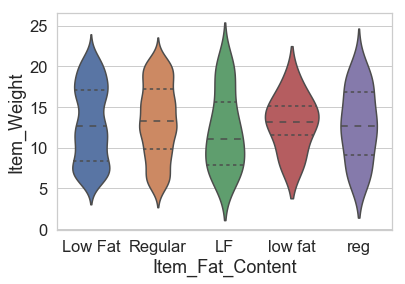

In [16]:
sns.violinplot(x='Item_Fat_Content', y='Item_Weight', 
               data=df_sales[df_sales.Item_Type.isin(['Soft drinks', 'Meat', 'Fruits and Vegetables'])], inner='quartiles')